# CSCN8000 –Artificial Intelligence Algorithms and Mathematics


Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import stats

## Lab 2 : Practical Part A

Load dataset and initialise count vectoriser

In [3]:
# Load the dataset
text_classify_dataset = pd.read_csv('./Dataset/Lab2_dataset.csv')
text_classify_dataset.head(5)

# Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size
# CountVectorizer : convert text into matrix of numbers 
# It count frequency for each word, sort words by its frequency : pick top 500 tokens/ features / words
text_vectorizer = CountVectorizer(max_features=500)
# Read text column from .csv and transform all rows's text into vectors
x_text_vectors = text_vectorizer.fit_transform(text_classify_dataset["text"])
print(x_text_vectors.toarray())
# Consider "spam_status" as 0/1 in column "label_num"
y_spam_status = text_classify_dataset['label_num'] # here 1= spam and 0 = not spam

[[ 1  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  8  0  2]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  7  0 10]]


Review tokens in metrices

In [4]:
# Display list of words with frequency - optional for understanding only 
word_counts = np.array(x_text_vectors.sum(axis=0)).flatten()
words = text_vectorizer.get_feature_names_out()
word_freq = list(zip(words, word_counts))
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)
# for word, freq in word_freq_sorted:
#     print(f"'{word}': {freq}")

Train the model : Use 75% data for training and 25% for testing

In [5]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_text_vectors, y_spam_status, test_size=0.25, random_state=42)
print("Training set shape (Emails count) - 75% :", X_train.shape)
print("Testing set shape (Emails count)  - 25% :", X_test.shape)



Training set shape (Emails count) - 75% : (3878, 500)
Testing set shape (Emails count)  - 25% : (1293, 500)


#### 1. The Multinomial Naiive Bayes : Train, test and validate accuracy

In [6]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
spam_pred_nb = nb_model.predict(X_test)
print(classification_report(y_test, spam_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       930
           1       0.80      0.89      0.84       363

    accuracy                           0.91      1293
   macro avg       0.88      0.90      0.89      1293
weighted avg       0.91      0.91      0.91      1293



#### 2. The gaussian naive bays model : Train, test and validate accuracy

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_text_vectors.toarray(), y_spam_status, test_size=0.25, random_state=42)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train) 
spam_pred_gnb = gnb_model.predict(X_test)
print(classification_report(y_test, spam_pred_gnb))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       930
           1       0.82      0.97      0.89       363

    accuracy                           0.93      1293
   macro avg       0.90      0.94      0.92      1293
weighted avg       0.94      0.93      0.93      1293



#### 3. Sklearn RandomForestClassifier model : Train, test and validate accuracy

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       930
           1       0.94      0.98      0.96       363

    accuracy                           0.98      1293
   macro avg       0.97      0.98      0.97      1293
weighted avg       0.98      0.98      0.98      1293



#### Comparison for all 3 model

Considering Accuracy for top 500 tokens, Random Forest classifier (0.98) > gaussian naive bays (0.93) > Multinomial Naiive Bayes (0.91) 
<br>
i.e **Random forest classifier performs** better compared to other 2 models, the reason behind this is that random forest make multiple decision tree based on token and its frequency considering the ouput, in our case its spam/not spam
<br>
Here, the prediction is taken from average from all tree's predictions.
<br>
<br>

**Multinomial Naive Base** gave least accuracy because, The alorithm performs better with descrete data like text and its frequency, in spam detection. the words in top 500 may not have all the features to identify which one is to be taken as idintification of "spam" 
<br>
<br>

**Gaussian Naive bays** is designed for data which follows normal destribution, here, there is no co-relation between text token and its frequency which can identify weather the email is spam or not. however, combination of some token has this model better than multinomial naive base


## Lab 2 : Practical Part B

In [9]:
AB_NYC_dataset = pd.read_csv('./Dataset/AB_NYC_2019.csv')
AB_NYC_dataset.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


First check for mean median and mode for price 

In [10]:
# First calculate price per night
# AB_NYC_dataset['price_per_night'] = AB_NYC_dataset['price'] / AB_NYC_dataset['minimum_nights']

print(f"Mean: {AB_NYC_dataset['price'].mean()}")
print(f"Median: {AB_NYC_dataset['price'].median()}")
print(f"Mode: {AB_NYC_dataset['price'].mode()[0]}")
print(f"1st quantile: {AB_NYC_dataset['price'].quantile(0.25)}")
print(f"3rd quantile: {AB_NYC_dataset['price'].quantile(0.75)}")


Mean: 152.7206871868289
Median: 106.0
Mode: 100
1st quantile: 69.0
3rd quantile: 175.0


Our mean, median and mode values are between in range of 100 to 200,
<br>
among that, 25% data has price < 69
among that, 75% data has price < 175
<br>
<br>
Next step to validate the destribution

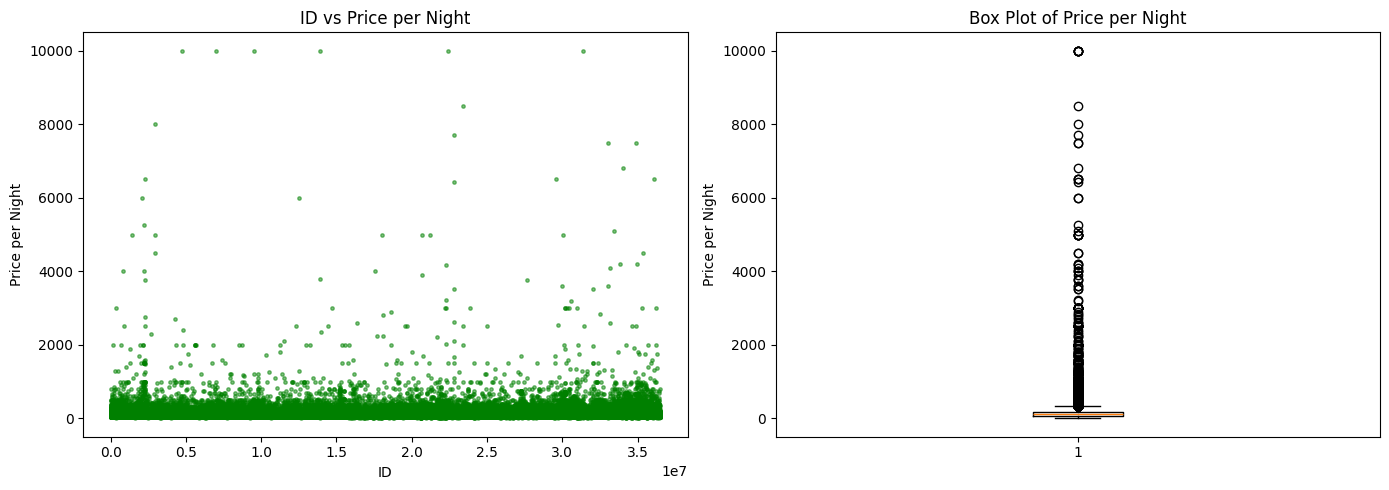

In [11]:
# Considering price column indicates price per night
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot to see destribution
# axes[0].figure(figsize=(8, 5))
axes[0].scatter(AB_NYC_dataset['id'], AB_NYC_dataset['price'], alpha=0.5,s=6,c="green")
axes[0].set_title('ID vs Price per Night')
axes[0].set_xlabel('ID')
axes[0].set_ylabel('Price per Night')

# Box plot to check outliers
# axes[1].figure(figsize=(8, 6))
axes[1].boxplot(AB_NYC_dataset['price'])
axes[1].set_title('Box Plot of Price per Night')
axes[1].set_ylabel('Price per Night')
plt.tight_layout()
plt.show()

Our prices ranges between 0 to 10,000 as per above plot, on addition to this, box plot identifies that there are many outliers present in the data

### Z-Score Approach

In [12]:
z_scores = stats.zscore(AB_NYC_dataset['price'])
print(z_scores)

0       -0.015493
1        0.300974
2       -0.011329
3       -0.265335
4       -0.302811
           ...   
48890   -0.344452
48891   -0.469373
48892   -0.157070
48893   -0.406912
48894   -0.261171
Name: price, Length: 48895, dtype: float64


Ideally, values with Z-socre **>3** and **<-3** are considered as outliers

In [13]:
outliers = np.abs(z_scores) > 3

Dataset after removing outliers

In [14]:
AB_NYC_dataset_clean_zscore = AB_NYC_dataset[~outliers]


Plotting after removing outliers

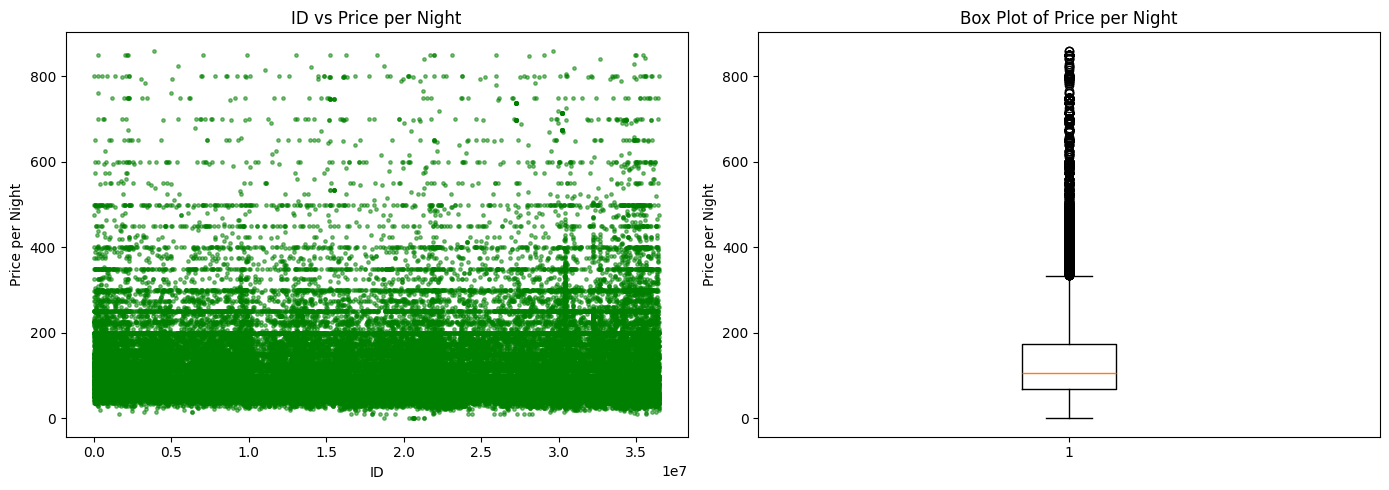

In [15]:
# Considering price column indicates price per night
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot to see destribution
# axes[0].figure(figsize=(8, 5))
axes[0].scatter(AB_NYC_dataset_clean_zscore['id'], AB_NYC_dataset_clean_zscore['price'], alpha=0.5,s=6,c="green")
axes[0].set_title('ID vs Price per Night')
axes[0].set_xlabel('ID')
axes[0].set_ylabel('Price per Night')

# Box plot to check outliers
# axes[1].figure(figsize=(8, 6))
axes[1].boxplot(AB_NYC_dataset_clean_zscore['price'])
axes[1].set_title('Box Plot of Price per Night')
axes[1].set_ylabel('Price per Night')
plt.tight_layout()
plt.show()

Compared to previous plot, destribution is better after outliers are removed